## LSTAM预测时序

### 1.1 为什么使用LSTM处理时序问题
1. LSTM擅长处理"跨很长序列的输入数据",它擅长处理有记忆状态的数据
2. LSTM可以无缝处理"多个输入变量产生多个输出变量的问题",我们要做的只是构造一个3D的输入向量提供给LSTM.而传统的线性回归则只能预测一个输出变量
3. LSTM可以灵活组合使用:  
  1. 可以组合一些seq2seq LSTM模型来预测时序, 比如
    1. 多对一 : 用所有之前时间步的输入数据预测当前时间戳下的输出数据
    2. 多对多 : 用所有之前时间步的输入数据预测未来多个时间步的输出
  2. 可以自定义预测当前时间步的输出所需的look-back窗口大小
  
### 1.2 让我们看一个LSTM处理正弦波的问题

In [10]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense,Activation,Dropout
from keras.models import Sequential
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### 1. 导入数据, 画折线图

In [21]:
df = pd.read_csv("data/sine-wave.csv",header=None)
print df.shape
df.head()

(5001, 1)


,0
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


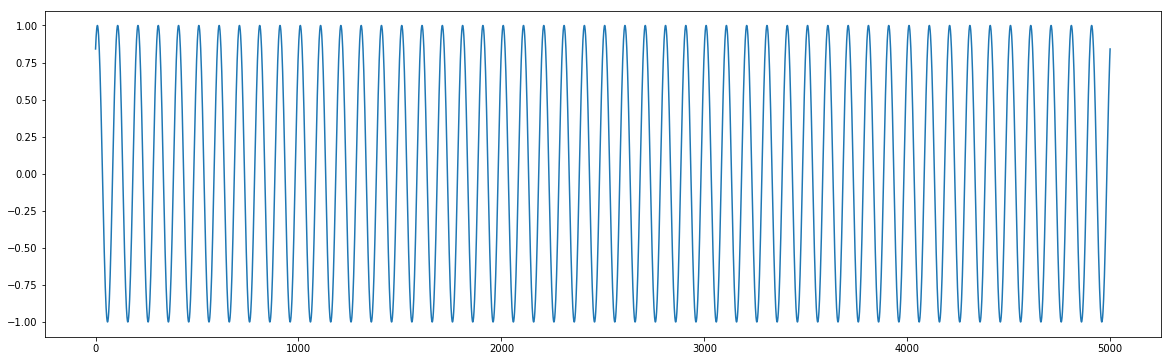

In [19]:
fig = plt.figure(figsize=(20,6))
plt.plot(df.values)
plt.show()

#### 2. 正则化数据

In [26]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaledData = scaler.fit_transform(df.values)
data = pd.DataFrame(scaledData) # ndarray to dataframe

#### 3. 构造包含前50个时间步的数据

In [ ]:
lookback_window = 50
# dataframe.shift(number):number>0下移n行,number<0上移n行
for i in range(0,lookback_window):
    data = pd.concat([data,data.shift(-(i+1))],axis=1)
data

#### 4. 构造3D数据,作为lstm的输入 
3D数据结构:(样本个数num_samples, 时间步长度num_time_steps, 特征个数num_feature)  
此处我们有num of time steps = 50 and num_features = 1 

#### 5. 构造lstm模型
我们使用两层LSTM模型, 第一层的LSTM结果会输送给第二层LSTM

#### 6. 用训练好的模型预测数据, 画出真实数据和预测数据的交叉的折线图
两种预测方式:   
1. 预测所有的测试序列, 输出下一个时间步的数据
2. 预测未来多个时间步的数据: 每次预测一个时间步的数据, 在使用这个预测到的数据作为下次预测的输入数据  
  这种方式我们看到, 离输入数据的时间步越远, 期预测数据湖真实数据的差异越大